# K-Means:


you can understand it here:-
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load the dataset
df=pd.read_csv("Data/Mall_Customers.csv")
df.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
features=df.iloc[:,3:].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [3]:
#Using the elbow method to find optimal no of clusters
from sklearn.cluster import KMeans 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    print(wcss)

[269981.28]
[269981.28, 181363.59595959596]
[269981.28, 181363.59595959596, 106348.37306211118]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21830.041978049434]
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21830.041978049434, 20736.679938924124]


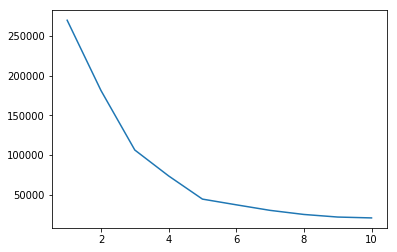

In [4]:
#draw th elbow graph
plt.plot(range(1,11),wcss)
plt.show()

In [5]:
#fitting the K-Means to the Dataset
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
y_means=kmeans.fit_predict(features)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

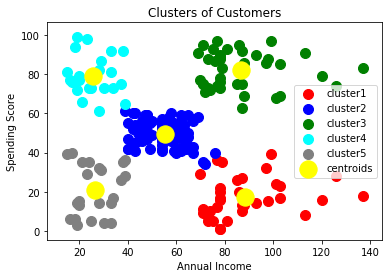

In [6]:
#Visualing the Clusters
plt.scatter(features[y_means==0,0],features[y_means==0,1],s=100,c="red",label="cluster1")
plt.scatter(features[y_means==1,0],features[y_means==1,1],s=100,c="blue",label="cluster2")
plt.scatter(features[y_means==2,0],features[y_means==2,1],s=100,c="green",label="cluster3")
plt.scatter(features[y_means==3,0],features[y_means==3,1],s=100,c="cyan",label="cluster4")
plt.scatter(features[y_means==4,0],features[y_means==4,1],s=100,c="grey",label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()